In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import random

import os
import sys
sys.path.append('../src')

from math_utils import *
from model import *
from utils import *

SEED = 42
np.random.seed(SEED)
random.seed(SEED)

# QR

## Complexity Analysis

Show that our implementation scale linearly in "m"

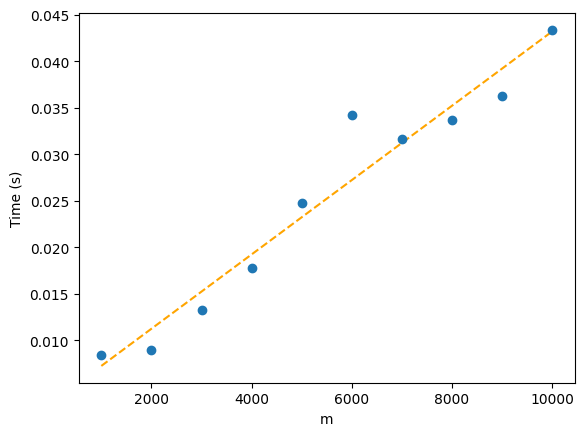

In [ ]:
plot_time_mean_variance_incr_n(n=256, trials=5, START=1000, END=10001, STEP=1000)

In [ ]:
plot_time_mean_variance_incr_n(n=512, trials=5, START=1000, END=10001, STEP=1000)

Show that our implementation scale linearly in "n"

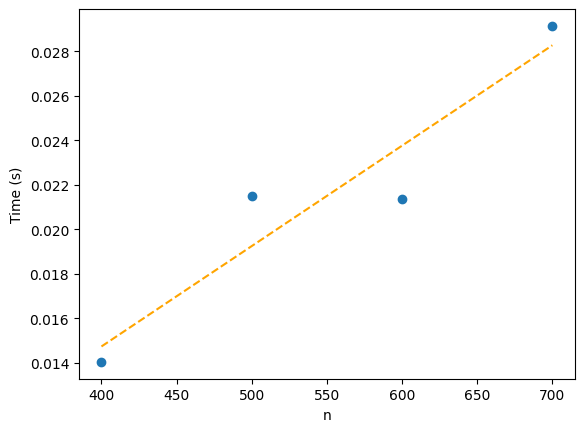

In [2]:
plot_time_mean_variance_incr_m(m=2000, trials=5, START=400, END=701, STEP=100)

## Accuracy Analisys

Show that our implementatio holds the theoretical accuracy/stability analysis. We use an "a posteriori" test exploiting the residual:

$\frac{||X - QR||}{||X||}$

### Uniform X

In [4]:
a, b = -1, 1
num_matrices = 100
END = 5000
MAX_N = 256

n_values = [random.randint(1, MAX_N) for _ in range(num_matrices)]
dimensions = [(random.randint(n + 1, END), n) for n in n_values]
matrices = [np.random.uniform(a, b, size=(m, n)) for m, n in dimensions]
new_columns = [np.random.uniform(a, b, size=(m, 1)) for m, _ in dimensions]

residuals = []

for i, matrix in enumerate(matrices):
    residuals.append(residual_QR_incr(matrix, new_columns[i]))

print(np.mean(residuals), np.var(residuals))


1.2735656003052682e-15 6.695198196245262e-32


### Normal X

In [6]:
loc, scale = 0, 1

n_values = [random.randint(1, MAX_N) for _ in range(num_matrices)]
dimensions = [(random.randint(n + 1, END), n) for n in n_values]
matrices = [np.random.normal(loc, scale, size=(m, n)) for m, n in dimensions]
new_columns = [np.random.normal(loc, scale, size=(m, 1)) for m, _ in dimensions]

residuals = []

for i, matrix in enumerate(matrices):
    residuals.append(residual_QR_incr(matrix, new_columns[i]))

print(np.mean(residuals), np.var(residuals))

1.278731140492884e-15 6.088858289554931e-32
